In [27]:
import os
import sys
import cv2
import numpy as np
from ultralytics import YOLO
import torch
import torchvision.transforms as transforms
import shutil
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [28]:
base_dir = "./data"

train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "Test")

In [29]:
image_size = (640, 640)

In [9]:
# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Train the model
model.train(data=os.path.join(base_dir, "data.yaml"), epochs=50, imgsz=640)

Ultralytics YOLOv8.2.103  Python-3.10.5 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./data\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 5.41MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     


  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256,

train: Scanning C:\Patricia Ho\Braincore\apnr\data\train\labels... 3087 images, 24 backgrounds, 152 corrupt: 100%|██████████| 3087/3087 [00:09<00:00,

train: WARNING  C:\Patricia Ho\Braincore\apnr\data\train\images\1-E-3977-QM-09-19_jpg.rf.0e0eb04bbaac97f1ef2845dc4e00e609.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0352]
train: WARNING  C:\Patricia Ho\Braincore\apnr\data\train\images\1-E-3977-QM-09-19_jpg.rf.80521b7fb43c77b1dedd6efda1cc8c33.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1022]
train: WARNING  C:\Patricia Ho\Braincore\apnr\data\train\images\101-E-4604-PS-09-17_jpg.rf.71bb31497a41e7fb69bc37b29a4a630f.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0579]
train: WARNING  C:\Patricia Ho\Braincore\apnr\data\train\images\101-E-4604-PS-09-17_jpg.rf.a054bbff55358984169c3957f1dff11e.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0995]
train: WARNING  C:\Patricia Ho\Braincore\apnr\data\train\images\107-E-4145-QZ-12-20_jpg.rf.a3ecef7db5d3272a41070bc878ac4feb.jpg: ignorin

train: New cache created: C:\Patricia Ho\Braincore\apnr\data\train\labels.cache


val: Scanning C:\Patricia Ho\Braincore\apnr\data\valid\labels... 464 images, 1 backgrounds, 45 corrupt: 100%|██████████| 464/464 [00:02<00:00, 201.13

val: WARNING  C:\Patricia Ho\Braincore\apnr\data\valid\images\106-E-4670-TL-05-22_jpg.rf.767f95258abd3a7ad3cf3198171bca5c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0139]
val: WARNING  C:\Patricia Ho\Braincore\apnr\data\valid\images\111-E-6810-IX-05-20_jpg.rf.70a1e83f186131251d45f0cf034cb61a.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [       1.02]
val: WARNING  C:\Patricia Ho\Braincore\apnr\data\valid\images\115-E-5305-SM-06-20_jpg.rf.7fe05ff1e17b3541ae39a0a98825f2fe.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0033]
val: WARNING  C:\Patricia Ho\Braincore\apnr\data\valid\images\123-E-4603-PAE-07-21_jpg.rf.f94576b7d5b69611916bbdaefb8c0676.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0606]
val: WARNING  C:\Patricia Ho\Braincore\apnr\data\valid\images\125-E-4172-QB-11-22_jpg.rf.12edb9bc0287fe6be3ba4392ff2b3c03.jpg: ignoring cor

val: New cache created: C:\Patricia Ho\Braincore\apnr\data\valid\labels.cache
Plotting labels to runs\detect\train9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train9
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.25G      1.086      1.633      1.374         17        640: 100%|██████████| 184/184 [00:40<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]

                   all        419        452      0.397      0.319      0.329      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.17G       1.05      1.107       1.32         16        640: 100%|██████████| 184/184 [00:37<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]

                   all        419        452      0.757      0.712      0.777      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.15G      1.037     0.9446      1.312         18        640: 100%|██████████| 184/184 [00:35<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]

                   all        419        452      0.482      0.823       0.67      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.15G      1.028     0.8685      1.308         21        640: 100%|██████████| 184/184 [00:40<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]

                   all        419        452      0.755      0.905      0.895      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.16G     0.9847     0.8078      1.272         22        640: 100%|██████████| 184/184 [00:38<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.88it/s]

                   all        419        452      0.598      0.746      0.758      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.15G      0.956     0.7785      1.257         31        640: 100%|██████████| 184/184 [00:40<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.81it/s]

                   all        419        452      0.879      0.909      0.911      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.15G     0.9454     0.7466      1.236         19        640: 100%|██████████| 184/184 [00:41<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.91it/s]

                   all        419        452      0.864      0.741      0.869      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.15G     0.8844     0.6885      1.221         21        640: 100%|██████████| 184/184 [00:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]

                   all        419        452      0.886      0.858      0.916      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.15G     0.8996     0.6859      1.214         25        640: 100%|██████████| 184/184 [00:49<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]

                   all        419        452      0.875      0.872      0.954      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.15G     0.8965     0.6613      1.208         15        640: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]

                   all        419        452      0.921      0.897       0.95      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.15G     0.8599      0.641      1.192         16        640: 100%|██████████| 184/184 [00:50<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]

                   all        419        452      0.906       0.94      0.974      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.15G     0.8615     0.6316      1.188         24        640: 100%|██████████| 184/184 [00:53<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.33it/s]

                   all        419        452      0.877      0.967      0.966      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.15G     0.8534     0.6177      1.186         18        640: 100%|██████████| 184/184 [00:53<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.51it/s]

                   all        419        452      0.951      0.929      0.985      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.18G     0.8313     0.6028      1.175         17        640: 100%|██████████| 184/184 [00:51<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]

                   all        419        452      0.967      0.967      0.986      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.15G     0.8224     0.5965      1.163         17        640: 100%|██████████| 184/184 [00:52<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.69it/s]

                   all        419        452      0.934      0.962      0.975      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.15G     0.8272     0.5849      1.168         17        640: 100%|██████████| 184/184 [00:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]

                   all        419        452       0.94      0.969       0.98      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.15G     0.8198     0.5829      1.157         14        640: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.76it/s]

                   all        419        452      0.939      0.959      0.978      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.15G     0.7963      0.566      1.152         18        640: 100%|██████████| 184/184 [00:50<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.61it/s]

                   all        419        452      0.947      0.979      0.968      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.15G     0.7864     0.5428      1.148         18        640: 100%|██████████| 184/184 [00:49<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]

                   all        419        452      0.971      0.979      0.988      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.16G     0.8232     0.5699      1.156         18        640: 100%|██████████| 184/184 [00:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.68it/s]

                   all        419        452      0.984      0.973      0.993      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.15G      0.786     0.5485       1.14         16        640: 100%|██████████| 184/184 [00:50<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.55it/s]

                   all        419        452       0.98      0.976      0.992      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.15G     0.7828     0.5416      1.138         26        640: 100%|██████████| 184/184 [01:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.18it/s]

                   all        419        452      0.978      0.977      0.989      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.15G      0.788     0.5418      1.144         23        640: 100%|██████████| 184/184 [01:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.21it/s]

                   all        419        452      0.982      0.982      0.992      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.15G     0.7558     0.5209       1.13         22        640: 100%|██████████| 184/184 [00:58<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        419        452      0.966      0.978      0.987      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.15G     0.7533     0.5114       1.13         18        640: 100%|██████████| 184/184 [00:58<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.61it/s]

                   all        419        452      0.982       0.97      0.984      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.15G     0.7676     0.5122      1.138         19        640: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        419        452      0.981      0.982      0.992      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.15G     0.7606     0.5096      1.129         14        640: 100%|██████████| 184/184 [00:49<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]

                   all        419        452      0.975      0.987      0.992      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.15G     0.7609       0.51      1.124         21        640: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]

                   all        419        452      0.978      0.981      0.993      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.17G     0.7332     0.4885      1.114         18        640: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]

                   all        419        452      0.984      0.985      0.994      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.15G     0.7347     0.4858      1.114         25        640: 100%|██████████| 184/184 [00:50<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]

                   all        419        452       0.98      0.985      0.992      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.15G     0.7425     0.4892      1.111         17        640: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]

                   all        419        452      0.986      0.987      0.994      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.15G     0.7398     0.4903      1.116         16        640: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.65it/s]

                   all        419        452       0.98      0.986      0.994      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.15G     0.7267     0.4834       1.11         14        640: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]

                   all        419        452       0.98      0.987       0.99      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.15G     0.7098     0.4654      1.102         23        640: 100%|██████████| 184/184 [00:50<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]

                   all        419        452      0.979      0.985      0.992      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.15G     0.7295     0.4711      1.101         18        640: 100%|██████████| 184/184 [00:53<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.32it/s]

                   all        419        452      0.984      0.987      0.992      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.15G     0.7046     0.4665      1.095         27        640: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.44it/s]

                   all        419        452      0.986      0.987      0.994      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.15G     0.7046       0.46      1.099         21        640: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]

                   all        419        452      0.986      0.987      0.987      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.17G     0.6869     0.4435       1.09         17        640: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.65it/s]

                   all        419        452       0.99      0.985      0.993      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.15G     0.6822     0.4426      1.089         14        640: 100%|██████████| 184/184 [00:50<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]

                   all        419        452       0.98      0.987      0.991      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.15G     0.6866      0.447      1.089         19        640: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.55it/s]

                   all        419        452      0.988      0.985      0.993      0.767


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.15G      0.838     0.4667      1.092          5        640: 100%|██████████| 184/184 [00:49<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.92it/s]

                   all        419        452      0.984      0.987      0.994      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.15G     0.8244     0.4364      1.078          7        640: 100%|██████████| 184/184 [00:43<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.84it/s]

                   all        419        452      0.987      0.989      0.994      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.15G     0.8064     0.4222      1.071          6        640: 100%|██████████| 184/184 [00:56<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.01it/s]

                   all        419        452      0.984      0.985      0.994      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.15G     0.7941     0.4221      1.053          6        640: 100%|██████████| 184/184 [00:52<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]

                   all        419        452      0.985      0.985      0.992       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.15G     0.7931     0.4185      1.061          4        640: 100%|██████████| 184/184 [00:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.22it/s]

                   all        419        452      0.987      0.985      0.994      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.15G      0.777     0.4059      1.051          8        640: 100%|██████████| 184/184 [00:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]

                   all        419        452      0.988      0.987      0.994       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.15G     0.7577     0.3955      1.051          9        640: 100%|██████████| 184/184 [00:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        419        452      0.985      0.988      0.994      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.15G      0.745     0.3877      1.042          7        640: 100%|██████████| 184/184 [00:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.28it/s]

                   all        419        452      0.986      0.987      0.994      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.15G     0.7451     0.3811      1.039         10        640: 100%|██████████| 184/184 [01:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.90it/s]

                   all        419        452      0.988      0.987      0.994      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.15G     0.7333     0.3774      1.033          5        640: 100%|██████████| 184/184 [00:53<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.28it/s]

                   all        419        452      0.988      0.987      0.994      0.797



50 epochs completed in 0.815 hours.
Optimizer stripped from runs\detect\train9\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train9\weights\best.pt, 6.2MB

Validating runs\detect\train9\weights\best.pt...
Ultralytics YOLOv8.2.103  Python-3.10.5 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]


                   all        419        452      0.988      0.987      0.994      0.797
Speed: 0.4ms preprocess, 2.9ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs\detect\train9


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002471155D840>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [10]:
model_best = YOLO('./runs/detect/train9/weights/best.pt')

In [30]:
# Set up directories
base_dir = "./data"
test_dir = os.path.join(base_dir, "Test")
images_dir = os.path.join(test_dir, "images")
labels_dir = os.path.join(test_dir, "labels")

# Load the YOLOv8 model
model = YOLO('runs/detect/train9/weights/best.pt')  # Path to your trained model

# Initialize lists to store true and predicted labels
y_true = []
y_pred = []

# Define class for 'plat'
plat_class_id = 0  # Assuming class 0 corresponds to 'plat'

# Process each image in the test set
for img_name in os.listdir(images_dir):
    if img_name.endswith(('.jpg', '.png', '.jpeg')):  # Filter for image files
        img_path = os.path.join(images_dir, img_name)
        
        # Load image
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Run inference
        results = model.predict(image_rgb)

        # Get predictions
        predictions = results[0]  # Get the first prediction result

        # Extract predicted class indices
        pred_classes = predictions.boxes.cls.cpu().numpy().astype(int) if predictions.boxes else []

        # Determine if a 'plat' was detected in the predictions
        detected_plat = any(pred_class == plat_class_id for pred_class in pred_classes)

        # Load the true labels from the labels directory
        label_path = os.path.join(labels_dir, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))
        
        # Determine if 'plat' is present in the true labels
        if os.path.exists(label_path):
            true_labels = np.loadtxt(label_path, dtype=int, usecols=(0))  # Assuming class labels are in the first column
            
            # Ensure true_labels is a list
            if true_labels.ndim == 0:  # Single value case
                true_labels = [true_labels.item()]  # Convert to list
            else:
                true_labels = true_labels.tolist()  # Convert to list
            
            # Check if 'plat' is present in true labels
            true_plat_present = any(true_label == plat_class_id for true_label in true_labels)
        else:
            true_plat_present = False  # No label file means no plat in the image

        # Append the ground truth and prediction as binary values
        y_true.append(1 if true_plat_present else 0)  # 1 if 'plat' is in true labels, 0 otherwise
        y_pred.append(1 if detected_plat else 0)  # 1 if 'plat' was detected, 0 otherwise


0: 640x640 1 plat, 24.0ms
Speed: 5.0ms preprocess, 24.0ms inference, 92.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 22.0ms
Speed: 8.0ms preprocess, 22.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 24.0ms
Speed: 6.0ms preprocess, 24.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 23.0ms
Speed: 6.0ms preprocess, 23.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 24.0ms
Speed: 6.0ms preprocess, 24.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 23.0ms
Speed: 6.1ms preprocess, 23.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 plats, 23.0ms
Speed: 7.0ms preprocess, 23.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 23.0ms
Speed: 7.0ms preprocess, 23.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 64

In [31]:
%matplotlib inline

Accuracy: 0.97
Precision: 1.00
Recall: 0.97
F1-Score: 0.98


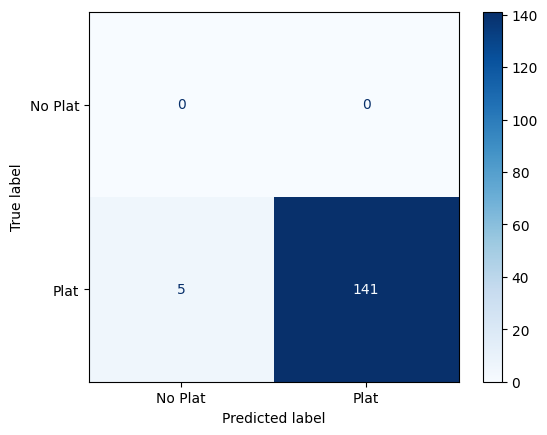

In [33]:
# Calculate confusion matrix if both lists are populated
if y_true and y_pred:
    # Calculate metrics (Accuracy, Precision, Recall, F1-Score)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Display the results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    # Display the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Plat', 'Plat'])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
else:
    print("No predictions or true labels to calculate metrics.")